In [23]:
import numpy as np
from medusa.data import get_example_h5
from medusa.render import Renderer
from medusa.io import VideoLoader
import matplotlib.pyplot as plt
from medusa.io import load_h5
plt.rcParams['axes.facecolor']='k'
plt.rcParams['savefig.facecolor']='k'
from OpenGL.GL import glLineWidth

In [28]:
data = load_h5('../pexels_2.h5')
vid = VideoLoader('../pexels_2_black.mp4', device='cpu', channels_first=False)
imgs = np.concatenate([batch.numpy() for batch in vid])

In [14]:
renderer = Renderer(viewport=data.img_size, camera_type='intrinsic', wireframe=True, wireframe_color=(1, 1, 1, 1))

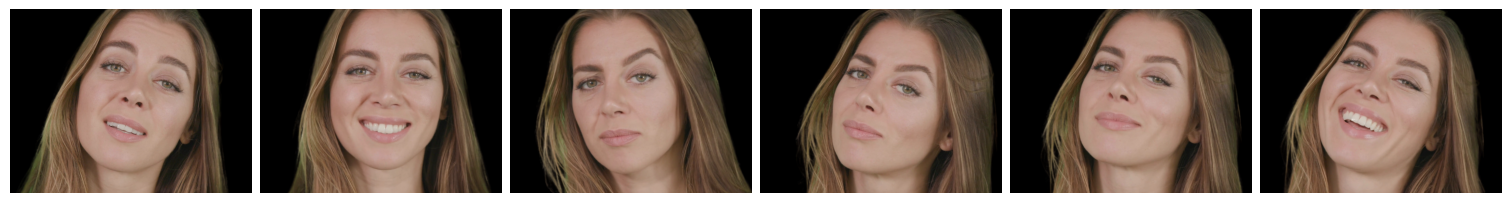

In [38]:
glLineWidth(5)
indices = [0, 27, 49, 118, 142, 161]#, 199]
fig, axes = plt.subplots(ncols=len(indices), constrained_layout=True, figsize=(15, 5))
for i, idx in enumerate(indices):
    img = renderer(data.v[idx, ...], data.f).copy()
    img = img[:, 500:, :]
    bg = imgs[idx, :, 500:, :]
    #bg = np.zeros_like(img)[:, :, :3]
    #img = renderer.alpha_blend(img, bg)
    axes[i].imshow(bg)
    axes[i].axis('off')
fig.savefig('test.png')